Previsões: ['Montagem' 'Teste']
Acurácia: 1.0


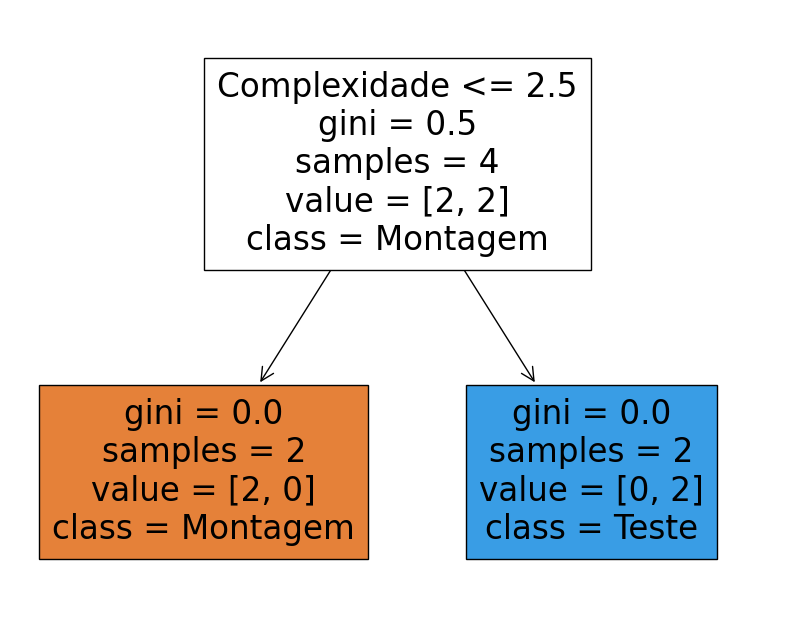

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dados de treinamento
velocidade = np.array([10, 5, 8, 6, 12, 4])
complexidade = np.array(['Baixo', 'Alto', 'Médio', 'Alto', 'Baixo', 'Alto'])
manutencao = np.array(['Baixo', 'Alto', 'Médio', 'Alto', 'Baixo', 'Médio'])
classificacao = np.array(['Montagem', 'Teste', 'Montagem', 'Teste', 'Montagem', 'Teste'])
 
# Organizar os dados em um único array
dados = np.column_stack((velocidade, complexidade, manutencao))

# Mapear os valores textuais para números (opcional)
complexidade_map = {'Baixo': 1, 'Médio': 2, 'Alto': 3}
manutencao_map = {'Baixo': 1, 'Médio': 2, 'Alto': 3}

dados[:, 1] = np.vectorize(complexidade_map.get)(dados[:, 1])
dados[:, 2] = np.vectorize(manutencao_map.get)(dados[:, 2])

# Dividir os dados em conjunto de treinamento e teste
dados_treinamento, dados_teste, classificacao_treinamento, classificacao_teste = train_test_split(dados, classificacao, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Árvore de Decisão
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(dados_treinamento, classificacao_treinamento)

# Realizar previsões no conjunto de teste
previsoes = modelo.predict(dados_teste)

# Calcular a acurácia do modelo
acuracia = accuracy_score(classificacao_teste, previsoes)

print("Previsões:", previsoes)
print("Acurácia:", acuracia)

# Visualizar a Árvore de Decisão (opcional)
plt.figure(figsize=(10, 8))
from sklearn.tree import plot_tree
plot_tree(modelo, feature_names=['Velocidade', 'Complexidade', 'Manutenção'], class_names=['Montagem', 'Teste'], filled=True)
plt.show()
